## **6.2 Exploring Relationships**

### **Contents**
1. Importing Visualization Libraries and Data
2. Additional Data Organizing - Adding New Columns
   * Extract and label column **month**
   * Extract day of week
   * Extract time of day
   * Create labeling column **accident hour** from **time of day**
   * Create labeling column **severity label** from **severity**
4. Exploring Relationships
   * Correlations (Matrix Heatmap)
   * Scatterplots
   * Pair Plots
   * Categorical Plots
5. Hypothesis

### **1. Importing Visualization Libraries and Data**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.ticker as mtick

In [2]:
# Creating data path

path = r'/Users/anjanpakhrin/Documents/US Accidents Analysis 2016-2023'

In [3]:
# Importing cleaned DataFrame from previous step

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-1.pkl'))

In [4]:
# Checking output

df.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,0.0,91.0,29.68,10.0,Calm,7.0,0.02,Light Rain,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,0.0,100.0,29.65,10.0,Calm,7.0,0.00,Light Rain,Night,Night,Night,Day


### **2. Additional Data Organizing**
In this section new columns will be added such as accident hour to ease the further analysis. Furthermore, new column for severity description will be created e.g., severity 1: Minor accident for easier analysis.

#### 2.1 Extract and label column month
* Might be helpful to analyze seasonal accident pattern

In [5]:
# Extraction of accident month from start_time --> 2 new columns

df['month'] = df['start_time'].dt.month
df['month_name'] = df['start_time'].dt.month_name()

In [6]:
# Quick check

df.head()

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,wind_direction,wind_speed(mph),precipitation(in),weather_condition,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,month,month_name
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,0.0,91.0,...,Calm,7.0,0.02,Light Rain,Night,Night,Night,Night,2,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,0.0,100.0,...,Calm,7.0,0.00,Light Rain,Night,Night,Night,Day,2,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,OH,36.0,33.3,100.0,...,SW,3.5,0.00,Overcast,Night,Night,Day,Day,2,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,OH,35.1,31.0,96.0,...,SW,4.6,0.00,Mostly Cloudy,Night,Day,Day,Day,2,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,OH,36.0,33.3,89.0,...,SW,3.5,0.00,Mostly Cloudy,Day,Day,Day,Day,2,February


#### 2.2 Creating column "day of week"
* Accident day of week derived from start_time *(Monday = 0, Sunday = 6)*

In [7]:
# Extraction of accident day from start_time

df['day_of_week'] = df['start_time'].dt.dayofweek

In [8]:
# Verifying extraction

df_sample = df.groupby('day_of_week').first().reset_index()
print(df_sample[['id', 'start_time', 'day_of_week']])

      id          start_time  day_of_week
0    A-1 2016-02-08 05:46:00            0
1   A-37 2016-02-09 04:28:48            1
2   A-72 2016-02-10 06:18:16            2
3   A-88 2016-02-11 05:32:29            3
4  A-123 2016-02-12 16:16:51            4
5  A-130 2016-02-13 11:05:00            5
6  A-136 2016-02-14 10:13:00            6


**Labeling day of week with name of day (Monday = 0, Sunday = 6)**

In [9]:
# Labeling new column accident_day

day_labels = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['accident_day'] = df ['day_of_week'].map(day_labels)

In [10]:
# Verifying extraction

df_sample_day = df.groupby('day_of_week').first().reset_index()
print(df_sample_day[['id', 'start_time', 'day_of_week', 'accident_day']])

      id          start_time  day_of_week accident_day
0    A-1 2016-02-08 05:46:00            0       Monday
1   A-37 2016-02-09 04:28:48            1      Tuesday
2   A-72 2016-02-10 06:18:16            2    Wednesday
3   A-88 2016-02-11 05:32:29            3     Thursday
4  A-123 2016-02-12 16:16:51            4       Friday
5  A-130 2016-02-13 11:05:00            5     Saturday
6  A-136 2016-02-14 10:13:00            6       Sunday


#### 2.3 Creating column "accident hour"
* Accident hours derived from start_time

In [11]:
# Create column accident_hour

df['accident_hour'] = df['start_time'].dt.hour

In [12]:
df.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,weather_condition,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,month,month_name,day_of_week,accident_day,accident_hour
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,0.0,91.0,...,Light Rain,Night,Night,Night,Night,2,February,0,Monday,5
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,0.0,100.0,...,Light Rain,Night,Night,Night,Day,2,February,0,Monday,6


#### 2.4 Labeling clock hour with day time
**Creiteria:** Derived from "accident_hour"
* **6 - 11:** Morning
* **12 - 17:** Afternoon
* **18 - 21:** Evening
* **22 - 5:** Night

In [13]:
# Creating labeling column time_of_day

df['time_of_day'] = np.select(
    [
        (df['accident_hour'] >= 6) & (df['accident_hour'] <= 11),
        (df['accident_hour'] >= 12) & (df['accident_hour'] <= 17),
        (df['accident_hour'] >= 18) & (df['accident_hour'] <= 21),
        (df['accident_hour'] >= 22) | (df['accident_hour'] <= 5)
    ],
    ['Morning', 'Afternoon', 'Evening', 'Night'],
    default='Unknown'
)

In [14]:
# Display in first fows 5 for quick check

df[['start_time', 'accident_hour', 'time_of_day']].head()

,start_time,accident_hour,time_of_day
0,2016-02-08 05:46:00,5,Night
1,2016-02-08 06:07:59,6,Morning
2,2016-02-08 06:49:27,6,Morning
3,2016-02-08 07:23:34,7,Morning
4,2016-02-08 07:39:07,7,Morning


#### 2.5 Labeling Severity Level with Description
**Criteria:** Derived from "severity"
* **1: Minor** accident (e.g., property damage, no injuries)
* **2: Moderate** accident (possible injuries, but not life-threatening)
* **3: Serious** accident (injuries requiring medical attention)
* **4: Major** accident (fatal or life-threatening injuries)

In [15]:
# Labeling and creating new column severity_label

severity_labels = {
    1: 'Minor',
    2: 'Moderate',
    3: 'Serious',
    4: 'Major'
}
df['severity_label'] = df ['severity'].map(severity_labels)

In [16]:
# Quick check

df[['id', 'severity', 'severity_label', 'time_of_day', 'visibility(mi)']].head()

,id,severity,severity_label,time_of_day,visibility(mi)
0,A-1,3,Serious,Night,10.0
1,A-2,2,Moderate,Morning,10.0
2,A-3,2,Moderate,Morning,10.0
3,A-4,3,Serious,Morning,9.0
4,A-5,2,Moderate,Morning,6.0


In [17]:
# Checking basic information of data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     category      
 1   source                 category      
 2   severity               int64         
 3   start_time             datetime64[ns]
 4   end_time               datetime64[ns]
 5   distance(mi)           float64       
 6   state                  category      
 7   temperature(f)         float64       
 8   wind_chill(f)          float64       
 9   humidity(%)            float64       
 10  pressure(in)           float64       
 11  visibility(mi)         float64       
 12  wind_direction         category      
 13  wind_speed(mph)        float64       
 14  precipitation(in)      float64       
 15  weather_condition      category      
 16  sunrise_sunset         category      
 17  civil_twilight         category      
 18  nautical_twilight     

In [18]:
# Change float64 into float32 & int64 into int32 to reduce memory usage

float64_cols = df.select_dtypes(include=['float64']).columns.tolist()
int64_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Convert float64 to float32
df[float64_cols] = df[float64_cols].astype('float32')

# Convert int64 to int32
df[int64_cols] = df[int64_cols].astype('int32')

print(df.dtypes)

id                             category
source                         category
severity                          int32
start_time               datetime64[ns]
end_time                 datetime64[ns]
distance(mi)                    float32
state                          category
temperature(f)                  float32
wind_chill(f)                   float32
humidity(%)                     float32
pressure(in)                    float32
visibility(mi)                  float32
wind_direction                 category
wind_speed(mph)                 float32
precipitation(in)               float32
weather_condition              category
sunrise_sunset                 category
civil_twilight                 category
nautical_twilight              category
astronomical_twilight          category
month                             int32
month_name                       object
day_of_week                       int32
accident_day                     object
accident_hour                     int32


### **3. Exploring Relationships**

#### 3.1 Exploring Correlations
##### Correlation Scale:
* **0:** No relationship
* **0.1 - 0.3:** Weak relationship
* **0.3 - 0.5:** Moderate relationship
* **0.5 - 1.0:** Strong relationship

In [19]:
# Selecting relevant variables (numerical only) for correlation check

numeric_df = df.select_dtypes(include=['number'])

# Inspecting numeric variables
numeric_df.describe()

,severity,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,5.618423e-01,6.171283e+01,4.318388e+01,6.487991e+01,2.954483e+01,9.111220e+00,7.634822e+00,6.010074e-03,6.706355e+00,2.594364e+00,1.232857e+01
std,4.875313e-01,1.754878e+00,1.871475e+01,3.184713e+01,2.249891e+01,1.827853e+00,2.815631e+00,5.174163e+00,9.304190e-02,3.641262e+00,1.806053e+00,5.464796e+00
min,1.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,4.900000e+01,2.938000e+01,1.000000e+01,5.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,8.000000e+00
50%,2.000000e+00,3.000000e-02,6.400000e+01,5.100000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,1.300000e+01
75%,2.000000e+00,4.640000e-01,7.600000e+01,7.100000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.000000e+01,4.000000e+00,1.700000e+01
max,4.000000e+00,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,1.200000e+01,6.000000e+00,2.300000e+01


##### **Correlation Matrix**

In [20]:
# Creating a correlation matrix for selected numerical variables

numeric_df.corr()

,severity,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour
severity,1.000000,0.034787,-0.019966,-0.174768,0.022079,0.042152,-0.002804,0.035751,0.009159,-0.010507,0.022364,0.012661
distance(mi),0.034787,1.000000,-0.052882,0.044692,0.008859,-0.090994,-0.035611,0.009332,0.002032,0.003922,0.023203,-0.001379
temperature(f),-0.019966,-0.052882,1.000000,0.411568,-0.330375,0.109474,0.215298,0.033500,-0.005061,0.132360,-0.006180,0.185361
wind_chill(f),-0.174768,0.044692,0.411568,1.000000,-0.164141,-0.157479,0.084290,-0.071633,-0.003881,0.048575,0.049890,0.090227
humidity(%),0.022079,0.008859,-0.330375,-0.164141,1.000000,0.115315,-0.379747,-0.168730,0.067798,0.037580,-0.019297,-0.274660
pressure(in),0.042152,-0.090994,0.109474,-0.157479,0.115315,1.000000,0.039787,-0.026255,0.003661,-0.002849,-0.027868,-0.014632
visibility(mi),-0.002804,-0.035611,0.215298,0.084290,-0.379747,0.039787,1.000000,0.013894,-0.097859,0.021561,0.000462,0.087625
wind_speed(mph),0.035751,0.009332,0.033500,-0.071633,-0.168730,-0.026255,0.013894,1.000000,0.017407,-0.085452,-0.005116,0.127094
precipitation(in),0.009159,0.002032,-0.005061,-0.003881,0.067798,0.003661,-0.097859,0.017407,1.000000,-0.000907,-0.001273,0.002114
month,-0.010507,0.003922,0.132360,0.048575,0.037580,-0.002849,0.021561,-0.085452,-0.000907,1.000000,-0.004216,0.017593


**Correlation Matrix Heatmap**

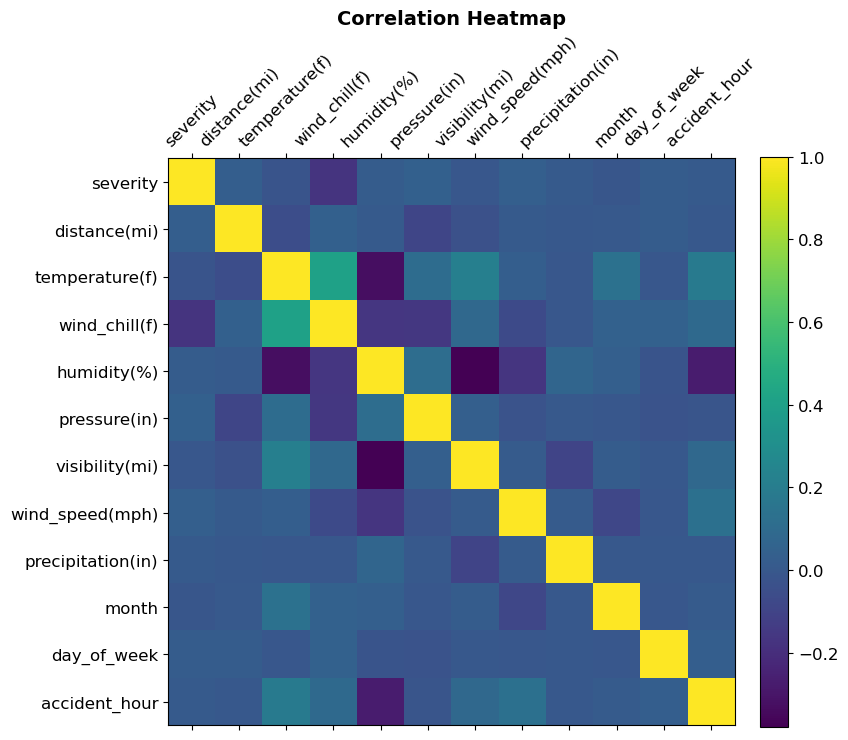

In [21]:
# Create Heatmap for numerical variables from previous step

f = plt.figure(figsize=(8, 8)) # figure size
ax = f.add_subplot(111)        # add a subplot inside figure

# Plot correlation matrix
cax = ax.matshow(numeric_df.corr())

# Label axis
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=12, rotation=45)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=12)

# Add title
ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Add legend (colorbar)
cb = f.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=12)

# Save heatmap
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_1.png'), bbox_inches='tight', dpi=300)

# Show plot
plt.show()

> **Observations:** The correlation heatmap illustrates the pairwise relationships among all variables. The color bar conveys the strength of these relationships through color intensity; however, the absence of numerical correlation values makes precise interpretation of the heatmap challenging.

**Correlation Matrix Heatmap with Seaborn**

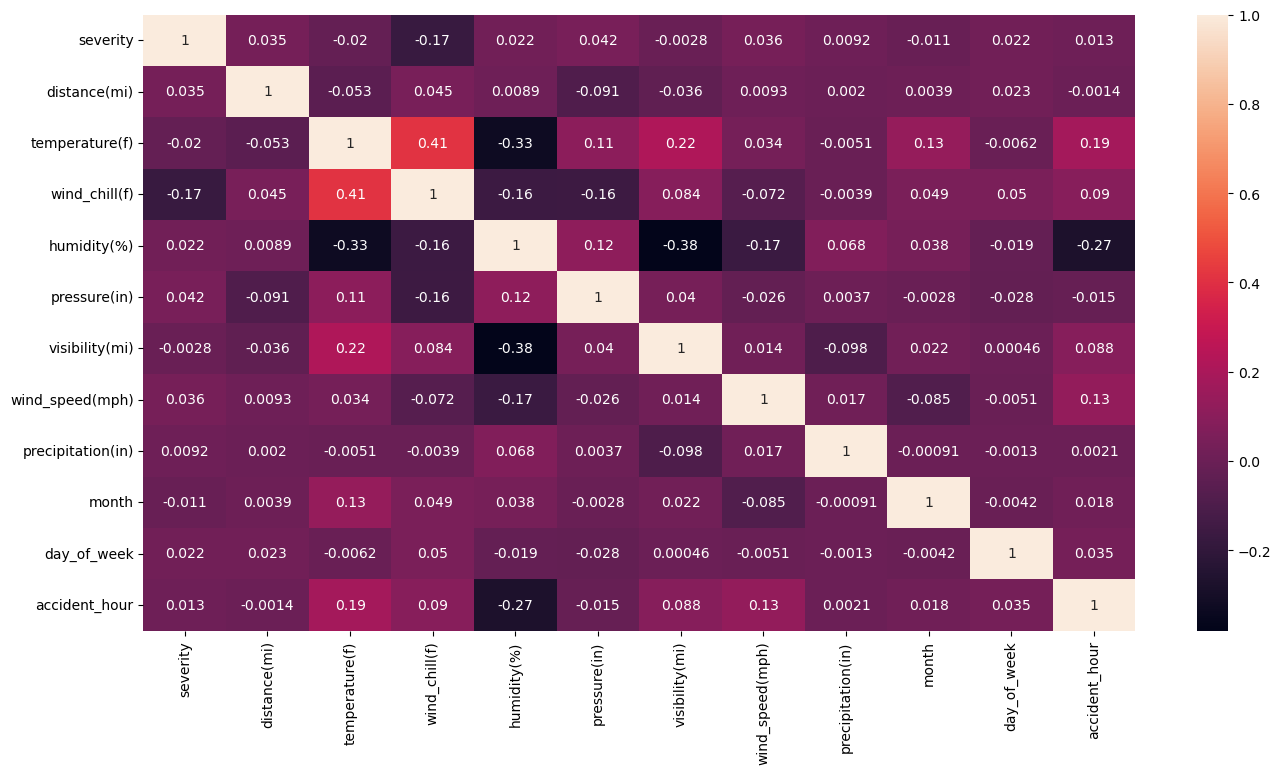

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(16,8))

# Create correlation heatmap with seaborn
# The 'annot' argument allows the plot to place the correlation coefficients onto the heatmap.
corr = sns.heatmap(numeric_df.corr(), annot = True, ax = ax)

# Save heatmap
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'corr_heatmap_2.png'), bbox_inches='tight', dpi=300)

# Show plot
plt.show()

> **Discuss what the coefficients in the plot mean in terms of the relationships between the variables.**
The correlation heatmap illustrates the pairwise relationships between selected variables. Overall, accident severity shows only **weak correlations** with the examined variables, indicating that **severity is not strongly explained** by individual numerical features in a linear way. Stronger associations are observed among environmental variables, such as **temperature and wind chill (0.41), humidity and visibility (-0.38), and temperature and humidity (-0.33)**, which reflect expected meteorological relationships. **Accident hour** demonstrates **weak positive correlations with temperature (0.19) and wind speed (0.13)**, consistent with daily weather cycles.

#### 3.2 Scatterplots for Strongest Correlations
##### **Strongest Correlations:**
* **Temperature vs. Wind Chill (0.41): A**
* **Humidity vs. Visibility (-0.38): B**
* **Temperature vs. Humidity (-0.33): C**
* **Accident Hour vs. Temperature (0.19): D** --> weak
- These don’t directly show strong links to severity to main analysis focus, but they reveal important environmental dynamics that can influence accidents. For example, lower visibility due to humidity may impact accident risk.

In [23]:
# Cheking dimension of dataframe

print(f"Dataframe Dimensions: {df.shape}")

Dataframe Dimensions: (7728394, 27)


> Since the dataframe has ca. **7.7 million rows** or accident records making challenging to create scatterplot for the whole dataset, sample dataset has been used. Sample dataset has been created from 20% of numeric dataframe

In [24]:
# Create sample dataset

np.random.seed(4)
dev = np.random.rand(len(numeric_df)) <= 0.8

# 20% of entire dataset for plotting
small_df = numeric_df[~dev]

# Displaye dataframe dimensions for quick check
print(f"Dataframe Dimensions: {small_df.shape}")

Dataframe Dimensions: (1545543, 12)


**Scatterplot: Temperature vs Wind Chill**

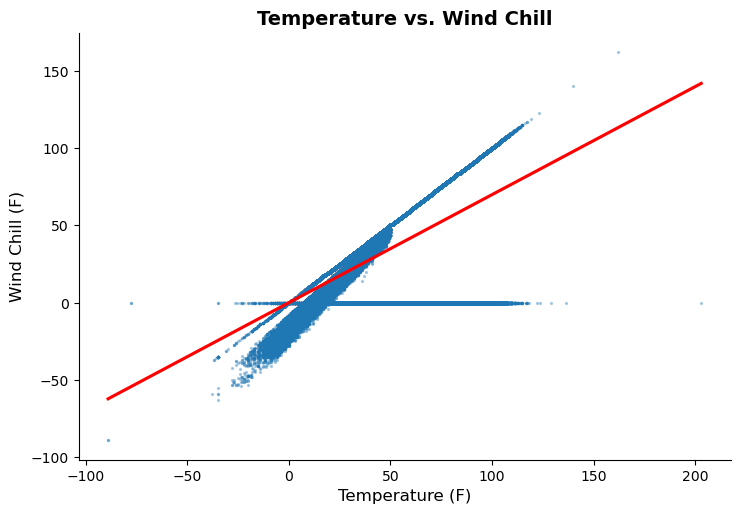

In [25]:
# Scatterplot Temperature vs Wind Chill
scatterplot_A = sns.lmplot(data=small_df, x='temperature(f)', y='wind_chill(f)', 
                          height=5, aspect=1.5,  # figure size
                          scatter_kws={'alpha': 0.3, 's': 2},
                          line_kws={'color':'red'})

# Adding labels
plt.title('Temperature vs. Wind Chill', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Wind Chill (F)', fontsize=12)

# Show scatterplot
plt.show()

> **Discussing output:** As expected, temperature and wind chill show a strong positive relationship, reflecting their inherent dependency. However, this relationship is more of a data validation step than a direct cause of accidents. It confirms that tthe weather data is logical.

**Scatterplot: Humidity vs. Visibility**

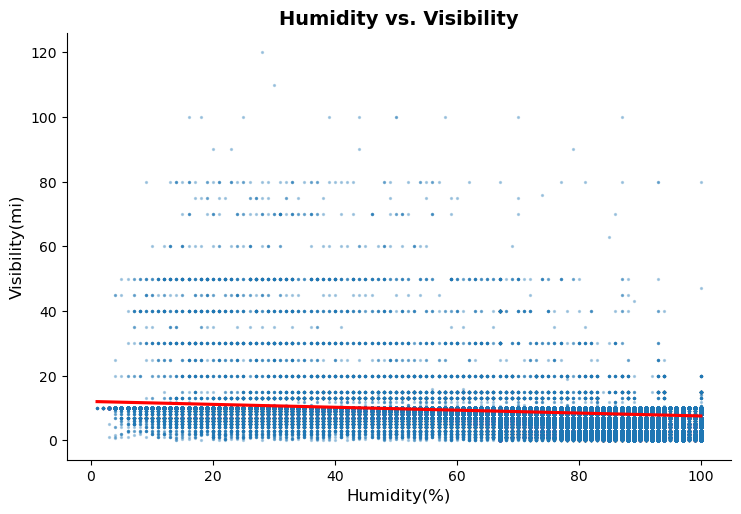

In [26]:
# Scatterplot for humidity vs. visibility
scatterplot_b = sns.lmplot(data=small_df, x='humidity(%)', y='visibility(mi)', 
                          height=5, aspect=1.5,  # figure size
                          scatter_kws={'alpha': 0.3, 's': 2},
                          line_kws={'color':'red'})

# Adding labels
plt.title('Humidity vs. Visibility', fontsize=14, fontweight='bold')
plt.xlabel('Humidity(%)', fontsize=12)
plt.ylabel('Visibility(mi)', fontsize=12)

# Show scatterplot
plt.show()

> **Discussing output:** Humidity and visibility exhibit a strong negative association, suggesting that higher humidity often coincides with reduced visibility, which can create hazardous driving conditions. This is a highly significant finding for further analysis. It directly links a common weather metric (humidity) to a critical safety factor (visibility). This relationship is central for severity and impact analysis, e.g., weather conditions associated with high-severity accidents and its correlation with visibility.

#### **Temperature vs Humidity**

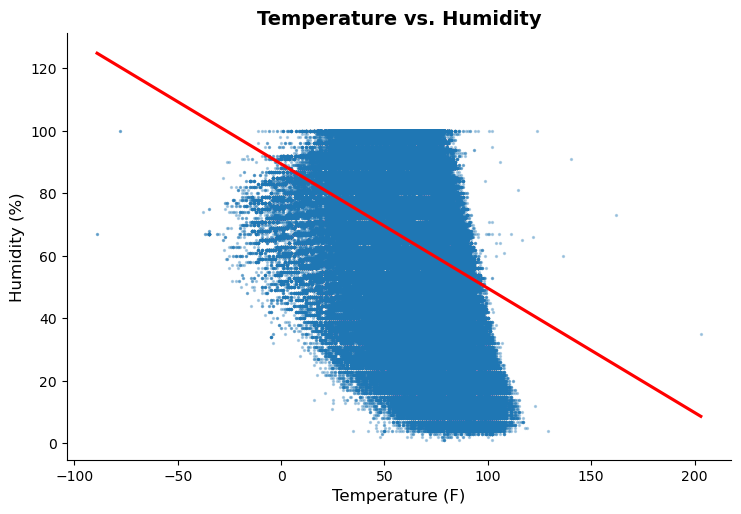

In [27]:
# Scatterplot for Temperature vs Humidity
scatterplot_c = sns.lmplot(data=small_df, x='temperature(f)', y='humidity(%)', 
                          height=5, aspect=1.5,  # figure size
                          scatter_kws={'alpha': 0.3, 's': 2},
                          line_kws={'color':'red'})

# Adding labels
plt.title('Temperature vs. Humidity', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)

# Show scatterplot
plt.show()

> **Discussing output:** Similarly, temperature and humidity display an inverse relationship, aligning with atmospheric patterns where higher temperatures generally lower relative humidity. This finding is less directly impactful than the humidity/visibility link.

#### **Accident Hour vs Temperature**

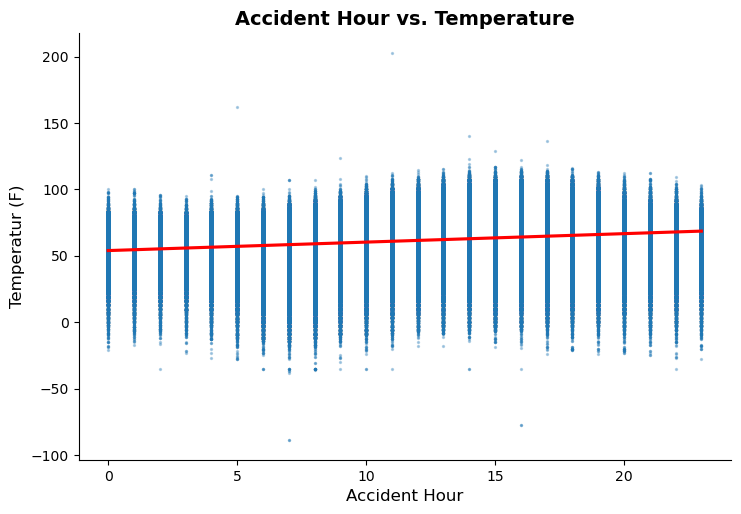

In [28]:
# Scatterplot for Accident Hour vs Temperature
scatterplot_c = sns.lmplot(data=small_df, x='accident_hour', y='temperature(f)', 
                          height=5, aspect=1.5,  # figure size
                          scatter_kws={'alpha': 0.3, 's': 2},
                          line_kws={'color':'red'})

# Adding labels
plt.title('Accident Hour vs. Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Accident Hour', fontsize=12)
plt.ylabel('Temperatur (F)', fontsize=12)

# Show scatterplot
plt.show()

> Plot indicates a slight tendency for accidents to occur at higher temperatures as the day progresses from early morning to late afternoon. This correlation is likely not causal. A confounding variable, the time of day, drives both trends. Temperature and traffic volume both rise from morning to afternoon. The relationship simply shows that more accidents occur during busier, warmer daylight hours, not that warmth itself causes accidents.

In [29]:
# Understanding spread of data in selected variables in previous steps
summary = df[['temperature(f)', 'wind_chill(f)', 'visibility(mi)', 'humidity(%)']].describe().round(2)
print(summary)

       temperature(f)  wind_chill(f)  visibility(mi)  humidity(%)
count      7728394.00     7728394.00      7728394.00   7728394.00
mean            61.71          43.18            9.11        64.88
std             18.71          31.85            2.82        22.50
min            -89.00         -89.00            0.00         1.00
25%             50.00           0.00           10.00        49.00
50%             64.00          51.00           10.00        67.00
75%             76.00          71.00           10.00        84.00
max            207.00         207.00          140.00       100.00


> **Note on Extremes:** The recorded values indicate some **outliers**, for example  the **visibility has min = 0 and maximum = 140 miles.** Similarly **maximum** recorded value for **temperature and wind chill is 207°F,** which is physically **implausible** for standard surface weather observations and may indicate data entry errors or non-standard reporting units that should be investigated.

#### Quick audit for **Extremes**

In [30]:
# Show rows where temperature(f) > 150 or wind_chill(f) > 150 or visibility(mi) > 100
extreme_values = (
    (df['temperature(f)'] > 150) | 
    (df['wind_chill(f)'] > 150) | 
    (df['visibility(mi)'] > 100)
)
extreme_rows = df.loc[extreme_values, ['id', 'temperature(f)', 'wind_chill(f)', 'visibility(mi)', 'start_time', 'state']]
pd.set_option('display.expand_frame_repr', False)
print(extreme_rows.to_string(index=False))

       id  temperature(f)  wind_chill(f)  visibility(mi)          start_time state
 A-220826       75.900002            0.0           105.0 2016-07-31 12:24:00    NY
 A-292024      161.600006            0.0            10.0 2016-10-19 12:06:30    TX
 A-301384       93.199997            0.0           111.0 2016-06-27 12:25:58    TX
 A-301387       93.199997            0.0           111.0 2016-06-27 12:44:07    TX
 A-504600      167.000000            0.0            10.0 2017-07-21 11:13:24    CT
 A-938653      196.000000          196.0            10.0 2021-08-12 14:11:52    AL
 A-938722      196.000000          196.0            10.0 2021-08-12 13:05:36    AL
A-1288293      189.000000          189.0             8.0 2020-09-07 10:31:21    OH
A-1389922      174.000000          174.0            10.0 2020-07-17 07:50:03    FL
A-1389924      174.000000          174.0            10.0 2020-07-17 07:59:36    FL
A-1390354      203.000000            0.0            10.0 2020-07-17 11:41:59    TX
A-20

In [31]:
# How many extreme rows in total?
print("Extreme rows:", extreme_rows.shape[0], "out of", df.shape[0])

# Distribution by state
print(extreme_rows['state'].value_counts())

# Distribution by year
extreme_rows['year'] = pd.to_datetime(extreme_rows['start_time']).dt.year
print(extreme_rows['year'].value_counts())

Extreme rows: 36 out of 7728394
state
NH    7
CA    7
AL    5
TX    5
NY    3
FL    3
VA    2
OH    1
IL    1
AZ    1
CT    1
VT    0
OR    0
NJ    0
NM    0
NV    0
WI    0
OK    0
PA    0
UT    0
RI    0
SC    0
WV    0
TN    0
NE    0
WA    0
SD    0
MT    0
ND    0
KY    0
CO    0
DC    0
DE    0
GA    0
IA    0
ID    0
IN    0
KS    0
LA    0
NC    0
MA    0
MD    0
ME    0
MI    0
MN    0
MO    0
MS    0
AR    0
WY    0
Name: count, dtype: int64
year
2020    9
2021    6
2016    5
2019    4
2022    4
2018    3
2023    3
2017    2
Name: count, dtype: int64


> **36 anomalies** out of **7.7 million** rows --> **0.00047%** of the entire dataset, which is **extremely small** fraction to impact my analysis. This also confirms that the recorded **extreme values are implausible readings (temperature/wind chill >150°F, visibility >100 miles), not true extreme weather events**. To keep the analysis transparent I would **flag and clean** the dataset. 

In [32]:
# Flag the extremes
df['extreme_flag'] = (
    (df['temperature(f)'] > 150) |
    (df['wind_chill(f)'] > 150) |
    (df['visibility(mi)'] > 100)
)

In [33]:
# Set to NaN
df.loc[df['extreme_flag'], ['temperature(f)', 'wind_chill(f)', 'visibility(mi)']] = np.nan

In [34]:
df.head(2)

,id,source,severity,start_time,end_time,distance(mi),state,temperature(f),wind_chill(f),humidity(%),...,nautical_twilight,astronomical_twilight,month,month_name,day_of_week,accident_day,accident_hour,time_of_day,severity_label,extreme_flag
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.900002,0.0,91.0,...,Night,Night,2,February,0,Monday,5,Night,Serious,False
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.900002,0.0,100.0,...,Night,Day,2,February,0,Monday,6,Morning,Moderate,False


In [35]:
# Save the outliers dataset
extreme_rows.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_extreme_outliers_6-2.csv'), index=False)

> **Since there are only have 36 extreme rows out of 7.7M, they will be droped instead of imputing — the impact is negligible, and avoids introducing artificial values.**

In [36]:
# Drop rows with extreme outliers
df_clean = df.dropna().copy()

# Display dimensions of cleaned dataset for quick check
print("Cleaned dataset shape:", df_clean.shape)

Cleaned dataset shape: (7728358, 28)


### **Summary Statistics after cleaning weather extreme outliers**

In [37]:
df_clean[['temperature(f)', 'wind_chill(f)', 'visibility(mi)']].describe()

,temperature(f),wind_chill(f),visibility(mi)
count,7.728358e+06,7.728358e+06,7.728358e+06
mean,6.171253e+01,4.318371e+01,9.111002e+00
std,1.871364e+01,3.184644e+01,2.811063e+00
min,-8.900000e+01,-8.900000e+01,0.000000e+00
25%,5.000000e+01,0.000000e+00,1.000000e+01
50%,6.400000e+01,5.100000e+01,1.000000e+01
75%,7.600000e+01,7.100000e+01,1.000000e+01
max,1.436000e+02,1.400000e+02,1.000000e+02


#### 3.3 Pairplots

> With about **1.5 million rows** and **12 numeric variables,** plotting the entire **numeric dataset for clean data (clean_numeric_df)** in a pairplot would still be **extremely heavy.** Therfore, sample dataset is used to create a pairplot.

In [38]:
# Selecting relevant variables (numerical only)

clean_numeric_df = df_clean.select_dtypes(include=['number'])

# Inspecting numeric variables
clean_numeric_df.describe()

,severity,distance(mi),temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),month,day_of_week,accident_hour
count,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06,7.728358e+06
mean,2.212384e+00,5.618427e-01,6.171253e+01,4.318371e+01,6.488001e+01,2.954483e+01,9.111002e+00,7.634807e+00,6.010102e-03,6.706354e+00,2.594363e+00,1.232858e+01
std,4.875302e-01,1.754881e+00,1.871364e+01,3.184644e+01,2.249887e+01,1.827854e+00,2.811063e+00,5.174129e+00,9.304212e-02,3.641265e+00,1.806053e+00,5.464791e+00
min,1.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,4.900000e+01,2.938000e+01,1.000000e+01,5.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,8.000000e+00
50%,2.000000e+00,3.000000e-02,6.400000e+01,5.100000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,7.000000e+00,3.000000e+00,1.300000e+01
75%,2.000000e+00,4.640000e-01,7.600000e+01,7.100000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01,0.000000e+00,1.000000e+01,4.000000e+00,1.700000e+01
max,4.000000e+00,4.417500e+02,1.436000e+02,1.400000e+02,1.000000e+02,5.863000e+01,1.000000e+02,1.087000e+03,3.647000e+01,1.200000e+01,6.000000e+00,2.300000e+01


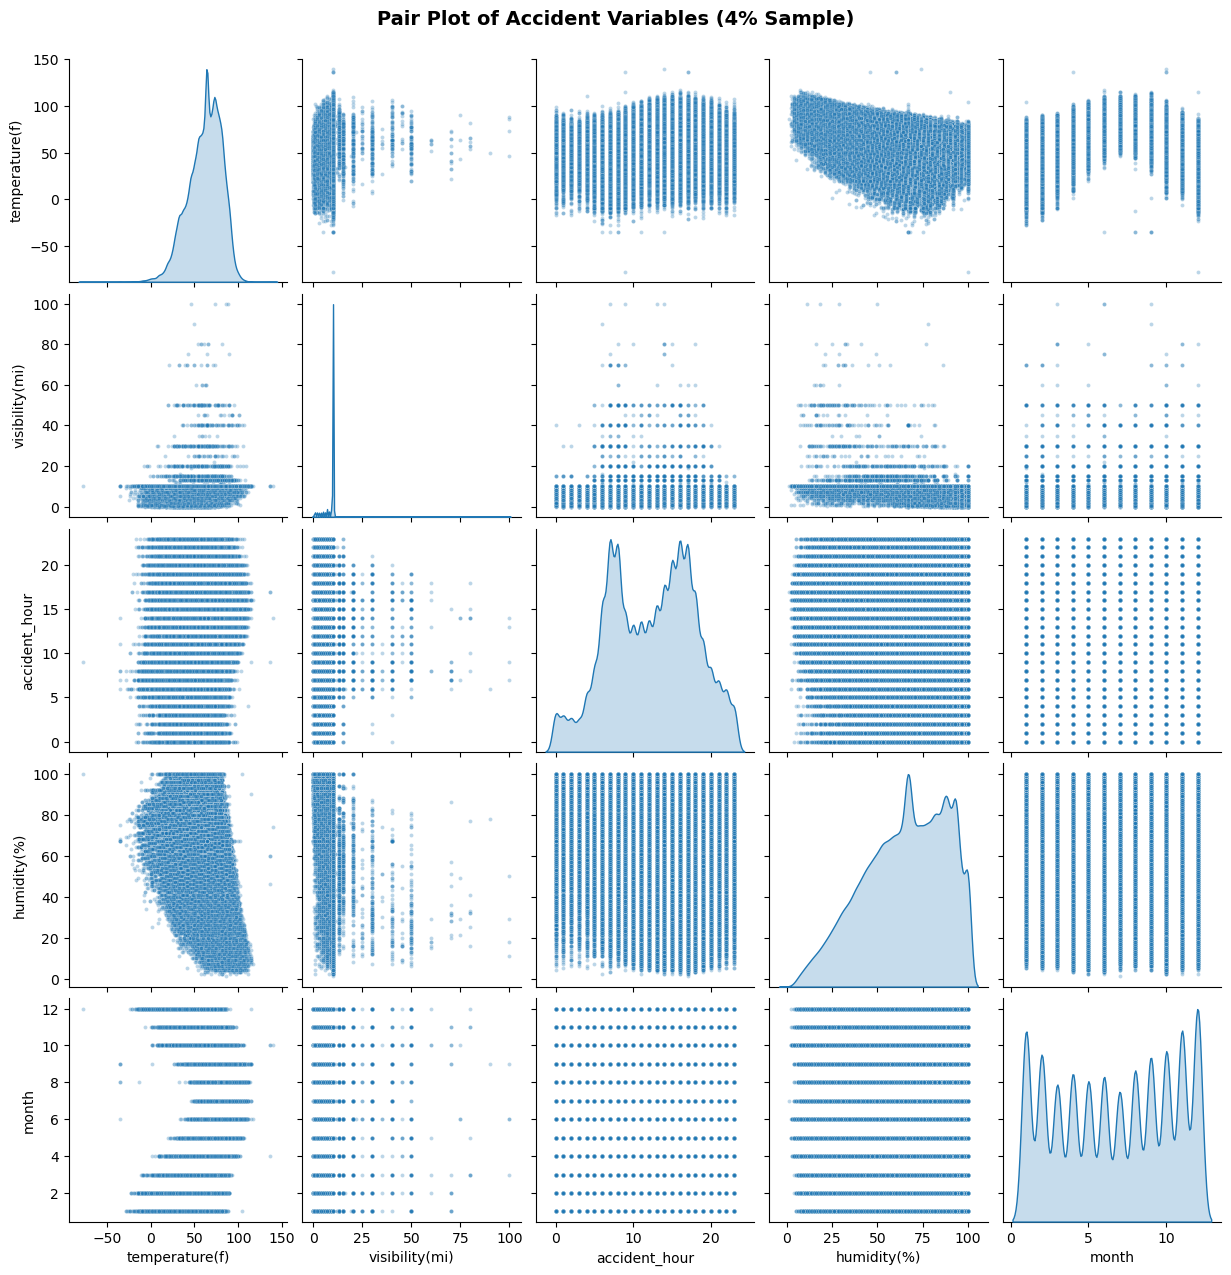

In [39]:
# Sample the data
clean_sample_df = clean_numeric_df.sample(frac=0.04, random_state=42)   # ~60,000 rows

# Select the most relevant numerical variables
vars_for_pairplot = [ 
    'temperature(f)',
    'visibility(mi)',
    'accident_hour', 
    'humidity(%)',
    'month'
]

# Create the pairplot
sns.pairplot(
    data=clean_sample_df[vars_for_pairplot],
    diag_kind='kde',                  # smoother distribution plots
    plot_kws={'alpha': 0.3, 's': 8}   # smaller dots + transparency
)

plt.suptitle("Pair Plot of Accident Variables (4% Sample)", y=1.02, fontsize=14, fontweight='bold')

# Show plot
plt.show()

> **Observation:** The pair plot shows how accident variables relate to each other. This plot does not reveal any strong or clear correlations between the selected accident variables. Instead, it shows that the dataset is consistent, with values falling within expected ranges. Some clustering is visible (e.g., accidents at certain hours, visibility around 10 miles), but no obvious linear relationships stand out. Overall, the data looks suitable for further analysis without major irregularities.

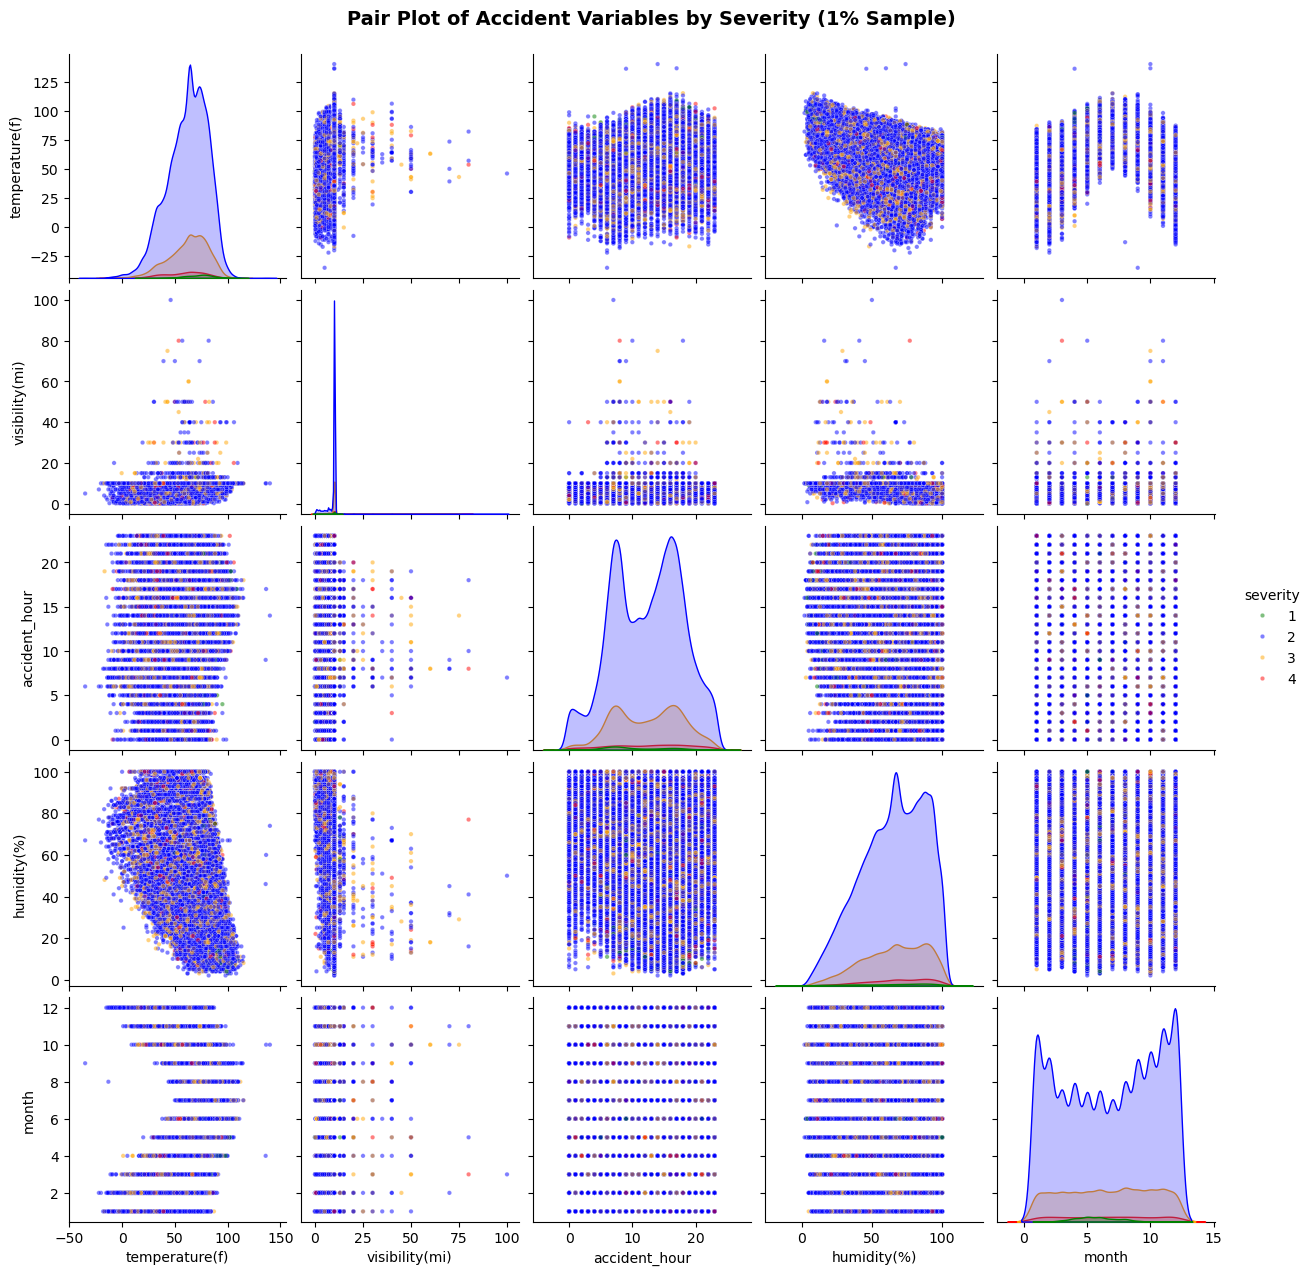

In [40]:
# Sample the data
clean_sample_hue_df = clean_numeric_df.sample(frac=0.01, random_state=42)

# Select variables including severity_label for hue
vars_for_pairplot = [ 
    'temperature(f)',
    'visibility(mi)',
    'accident_hour', 
    'humidity(%)',
    'month'
]

# Create the pairplot with severity_label as hue
sns.pairplot(
    data=clean_sample_hue_df[vars_for_pairplot + ['severity']],
    hue='severity',              # Color by severity category
    diag_kind='kde',                  
    plot_kws={'alpha': 0.5, 's': 10},
    palette=['green', 'blue', 'orange', 'red']  # Custom colors for severity levels
)

plt.suptitle("Pair Plot of Accident Variables by Severity (1% Sample)", y=1.02, fontsize=14, fontweight='bold')

# Show plot
plt.show()

> **Observation:**

#### 3.4 Categorical Plots

#### **Accident Frequency by Time Patterns**
- Further plotting and analysis is conducted with new cleaned dataset (df_clean)

##### **Hourly Frequency Pattern**

In [41]:
# Accident frequency by hour of day

hourly_freq = df_clean['accident_hour'].value_counts().sort_index()

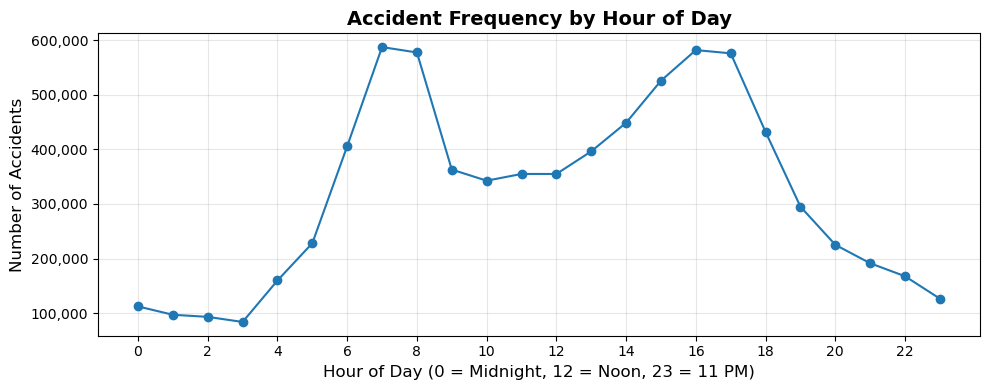

In [42]:
# Hourly pattern
plt.figure(figsize=(10, 4))
plt.plot(hourly_freq.index, hourly_freq.values, marker='o', linewidth=1.5, markersize=6)

# Labeling
plt.title('Accident Frequency by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0 = Midnight, 12 = Noon, 23 = 11 PM)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(0, 24, 2))

# Display value in y-axis in normal number format
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

> **Obervation:** The line chart reveals distinct **peaks** in accident frequency during the morning hours of **6-8 AM** and the afternoon period of **3-5 PM.** This pattern aligns with typical **rush hour** traffic when commuter volume significantly increases due to work schedules. Conversely, the midday hours from late morning to early afternoon show a notable decline in accident occurrences, corresponding with reduced traffic flow outside of peak commuting times.

##### **Daily Frequency Pattern**

In [43]:
print(df_clean['accident_day'].unique())

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


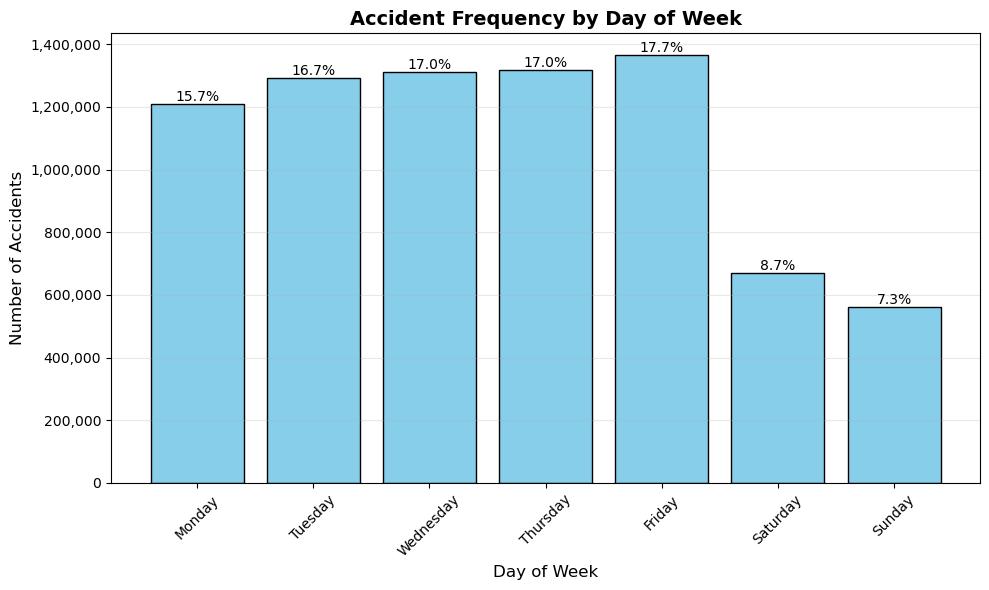

In [44]:
# Accident frequency by day
daily_freq = df['day_of_week'].value_counts().sort_index()

# Define day names for labeling
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate percentage
total_accidents = len(df_clean)
percentages = (daily_freq/total_accidents * 100).round(1)

# Plot chart
plt.figure(figsize=(10, 6))
bars = plt.bar(day_names, daily_freq.values, color='skyblue', edgecolor='black')

# Add percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{percentages[i]}%', ha='center', va='bottom')

# Labeling
plt.title('Accident Frequency by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Display value in y-axis in normal number format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

> **Observation:** The bar chart shows that Weekdays have significantly higher accident rates (15.7%-17.7%) compared to weekends (7.3%-8.7%).

##### **Monthly Frequency Pattern**

In [45]:
# Accident frequency by month

monthly_freq = df_clean['month_name'].value_counts()

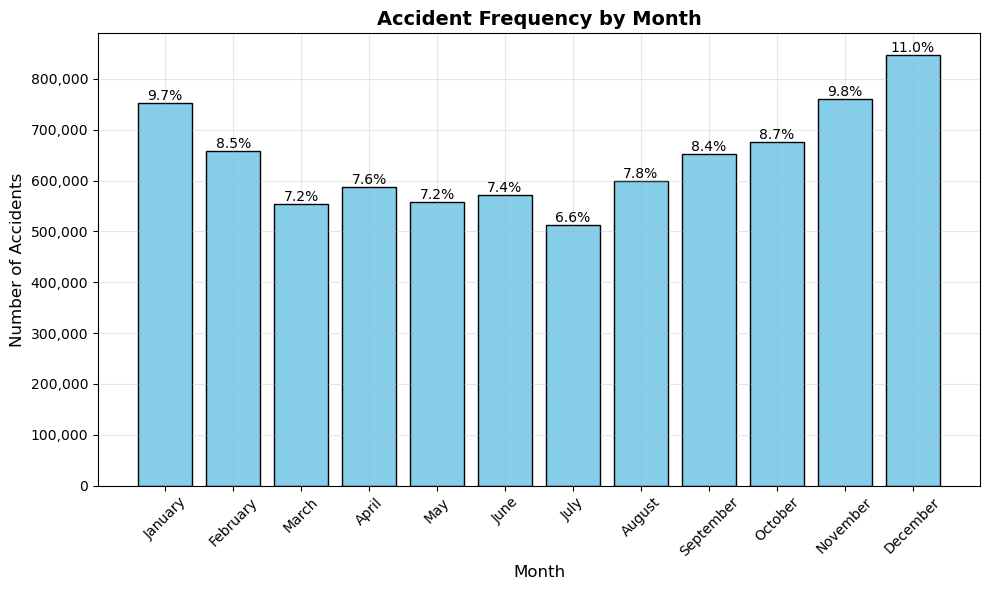

In [46]:
# Month frequency sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex to ensure Jan-Dec order
monthly_freq_sorted = monthly_freq.reindex(month_order)

# Calculate percentages
total_accidents = len(df_clean)
percentages = (monthly_freq_sorted.values / total_accidents * 100).round(1)

# Plot chart
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_freq_sorted.index, monthly_freq_sorted.values, color='skyblue', edgecolor='black')

# Add percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{percentages[i]}%', ha='center', va='bottom')

# Labeling
plt.title('Accident Frequency by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Display value in y-axis in normal number format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

> **Observation:** Chart shows the clear pattern that there are more raod accidents in winter months with the highest (11.7%) in Decemebr followed by January (9.7%) which might be related with weather conditions like visibility, rain or ice. Sommer months show clearly less accidents.

##### **Accident Frequency by State**

In [47]:
# State name mapping
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

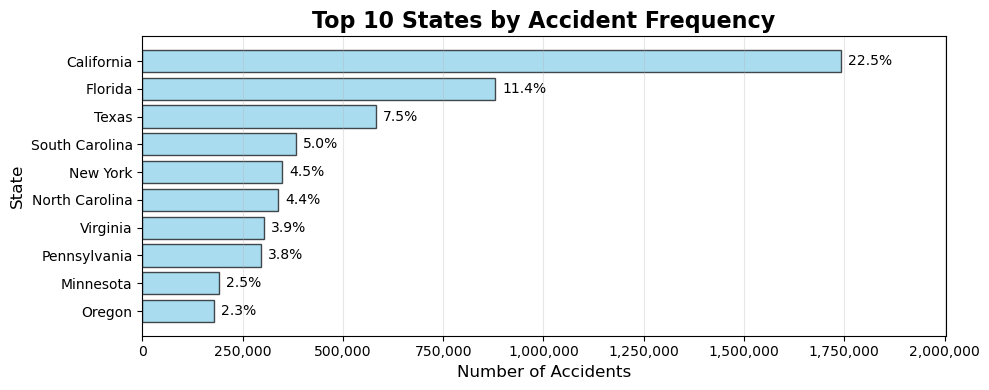

In [48]:
# Accident counts by State
top_states = df_clean['state'].value_counts().head(10)

# Sort the bar chart in ascending order
top_states_sorted = top_states.sort_values(ascending = True)

# Convert state abbreviations to full names for plotting
top_states_full_names = [state_names.get(state, state) for state in top_states_sorted.index]

# Calculate percentages
total_accidents = len(df_clean)
percentages = (top_states_sorted.values / total_accidents * 100).round(1)

# Plot horizontal bar chart
plt.figure(figsize=(10, 4))
bars = plt.barh(top_states_full_names, top_states_sorted.values, color='skyblue', edgecolor='black', alpha=0.7)

# Adding percentage labels on the RIGHT END of the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(top_states_sorted.values) * 0.01,  # Position slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2,  # Position in the middle vertically
             f'{percentages[i]}%', 
             ha='left', va='center',  # Left alignment to place text after the bar
             fontsize=10, 
             color='black')

# Labeling
plt.title('Top 10 States by Accident Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.grid(True, alpha=0.3, axis='x')

# Adjust x-axis limit to make space for the percentage labels
plt.xlim(0, max(top_states_sorted.values) * 1.15)

plt.tight_layout()

# Show plot
plt.show()

> **Observaton:** The bar chart shows the top 10 states in US by accident counts (2016 - 2023) with maximum accidents in California (22.5%) followed by Florida (11.4%) and Texas (7.5%) of total counts.

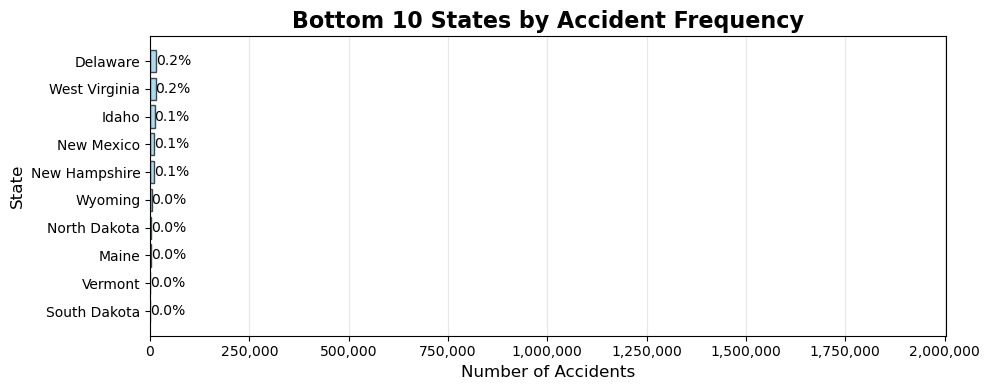

In [49]:
# Accident counts by State (bottom least counts)
bottom_states = df_clean['state'].value_counts().tail(10)

# Sort the bar chart in ascending order
bottom_states_sorted = bottom_states.sort_values(ascending = True)

# Convert state abbreviations to full names for plotting
bottom_states_full_names = [state_names.get(state, state) for state in bottom_states_sorted.index]

# Calculate percentages
total_accidents = len(df_clean)
percentages = (bottom_states_sorted.values / total_accidents * 100).round(1)

# Plot horizontal bar chart
plt.figure(figsize=(10, 4))
bars = plt.barh(bottom_states_full_names, bottom_states_sorted.values, color='skyblue', edgecolor='black', alpha=0.7)

# Adding percentage labels on the right of the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(bottom_states_sorted.values) * 0.01,  # Position slightly to the right of the bar
             bar.get_y() + bar.get_height() / 2,  # Position in the middle vertically
             f'{percentages[i]}%', 
             ha='left', va='center',  # Left alignment to place text after the bar
             fontsize=10, 
             color='black')

# Labeling
plt.title('Bottom 10 States by Accident Frequency', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.grid(True, alpha=0.3, axis='x')

# Adjust x-axis limit to make space for the percentage labels
plt.xlim(0, max(top_states_sorted.values) * 1.15)

plt.tight_layout()

# Show plot
plt.show()

> **Observaton:** The bar chart shows the bottom 10 states in US by accident counts (2016 - 2023) with least or no accidents in South Dakota and Vermont (0%).

##### **Trend of Accident Frequency by Year**

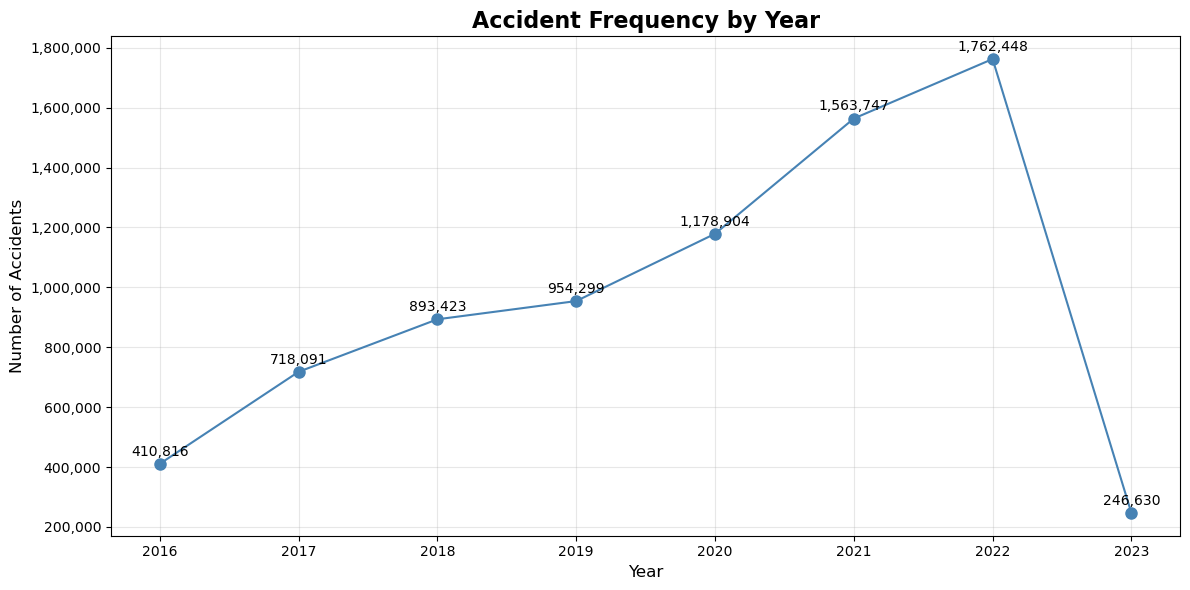

In [50]:
# Extract year from start_time (if not already done)
df_clean['year'] = df_clean['start_time'].dt.year

# Count accidents by year
yearly_accidents = df_clean['year'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_accidents.index, yearly_accidents.values, 
         marker='o', linewidth=1.5, markersize=8, color='steelblue')

# Add value labels on points
for year, count in yearly_accidents.items():
    plt.text(year, count + max(yearly_accidents.values)*0.01, 
             f'{count:,.0f}', ha='center', va='bottom')

# Labeling
plt.title('Accident Frequency by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.grid(True, alpha=0.3)

# Ensure all years are shown
plt.xticks(yearly_accidents.index)
plt.tight_layout()

# Show plot
plt.show()

> **Observation:** The line chart shows rising trend in the accident counts with significant drop in 2023, which is not normal. Therfore, further investigations in the data pattern are required.

#### Cross check accident frequency by year

**Check for signigicant drop in 2023**

In [51]:
print(f"Data range: {df_clean['start_time'].min()} to {df_clean['start_time'].max()}")

Data range: 2016-01-14 20:18:33 to 2023-03-31 23:30:00


> **Conclusion:** The plot and result are obvious now, since The data only goes up to March 31, 2023, so dataset only contains 3 months of data for 2023 compared to full years for previous years.

**Verify by checking the data for a few previous years**

In [52]:
# Check accidents by month for each year
print("Accidents by month for each year:")
for year in [2021, 2022, 2023]:
    year_data = df_clean[df_clean['year'] == year]
    monthly_counts = year_data['start_time'].dt.month.value_counts().sort_index()
    print(f"\n{year} (Total: {len(year_data):,}):")
    for month, count in monthly_counts.items():
        print(f"  Month {month}: {count:,} accidents")

Accidents by month for each year:

2021 (Total: 1,563,747):
  Month 1: 152,914 accidents
  Month 2: 154,935 accidents
  Month 3: 90,643 accidents
  Month 4: 90,888 accidents
  Month 5: 101,731 accidents
  Month 6: 131,472 accidents
  Month 7: 113,333 accidents
  Month 8: 120,863 accidents
  Month 9: 134,874 accidents
  Month 10: 134,287 accidents
  Month 11: 157,729 accidents
  Month 12: 180,078 accidents

2022 (Total: 1,762,448):
  Month 1: 135,900 accidents
  Month 2: 163,839 accidents
  Month 3: 140,143 accidents
  Month 4: 196,687 accidents
  Month 5: 159,566 accidents
  Month 6: 129,264 accidents
  Month 7: 140,670 accidents
  Month 8: 152,361 accidents
  Month 9: 139,016 accidents
  Month 10: 85,135 accidents
  Month 11: 130,959 accidents
  Month 12: 188,908 accidents

2023 (Total: 246,630):
  Month 1: 160,914 accidents
  Month 2: 55,529 accidents
  Month 3: 30,187 accidents


##### **Accidents by Year and Severity**

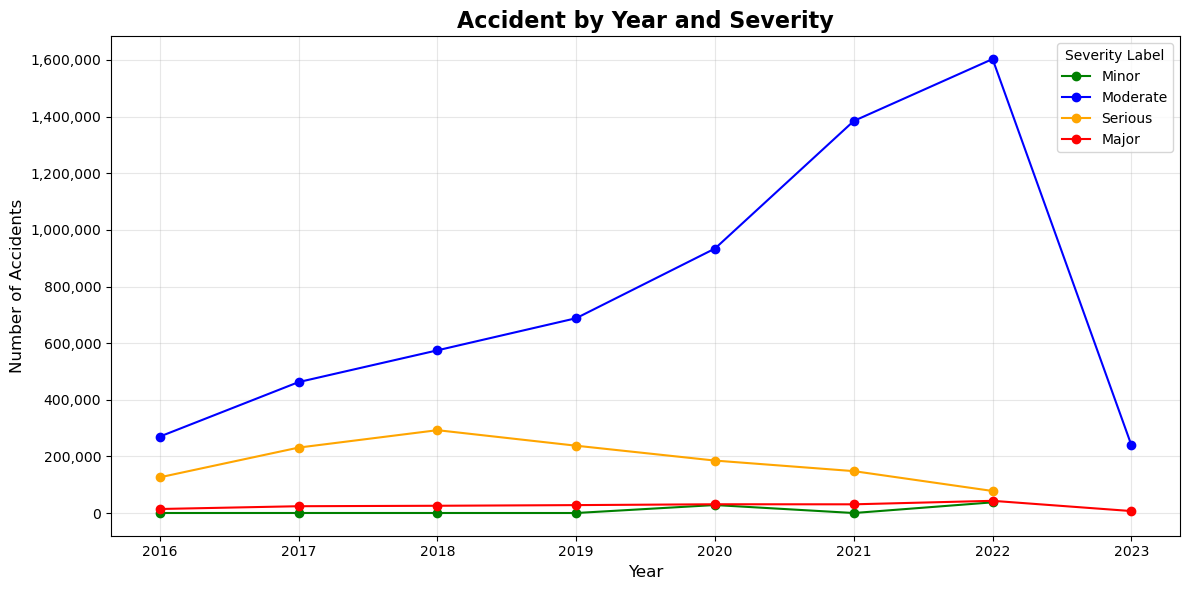

In [53]:
# Accident frequency by year and severity
yearly_severity = df_clean.groupby(['year', 'severity_label']).size().unstack()

# Plot lines for all severity labels
plt.figure(figsize=(12, 6))

# Colors for severity labels
colors = ['green', 'blue', 'orange', 'red']

# Order severity lavels
severity_order = ['Minor', 'Moderate', 'Serious', 'Major']

for i, severity in enumerate(severity_order):
    if severity in yearly_severity.columns:
        plt.plot(yearly_severity.index, yearly_severity[severity], 
                 marker='o', linewidth=1.5, markersize=6, 
                 label=severity, color=colors[i])

# Labeling
plt.title('Accident by Year and Severity', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, alpha=0.3)

# Define legend
plt.legend(title='Severity Label')

plt.xticks(yearly_severity.index)
plt.tight_layout()

# Show plot
plt.show()

> **Observation:** The chart demonstrate the road accident frequency by severity label (Minor, Moderate, Serious and Major) for 2016 - 2023 in the United States. The majority of accident is moderate in severity level. Chart also shows that the data for 2023 is incomplete as described in the previous steps.

> **INDEX**
> * 1: **Minor** accident (e.g., property damage, no injuries)
> * 2: **Moderate** accident (possible injuries, but not life-threatening)
> * 3: **Serious** accident (injuries requiring medical attention)
> * 4: **Major** accident (fatal or life-threatening injuries)

##### **Piechart to display proportion of accidents by severity**

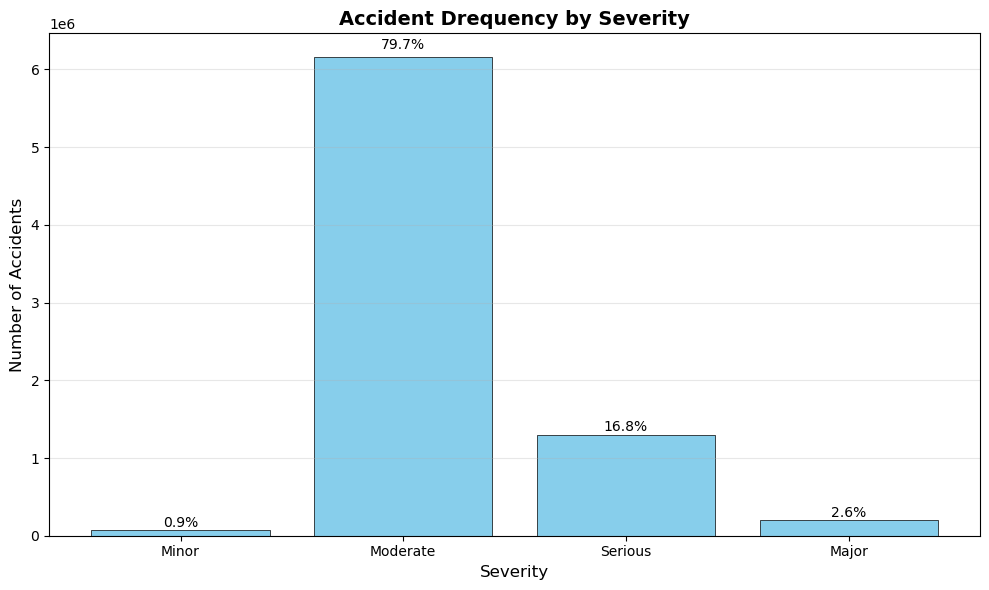

In [54]:
# Count the occurrences of each severity level
severity_counts = df_clean['severity_label'].value_counts()

# Ensure consistent order: Minor, Moderate, Serious, Major
severity_order = ['Minor', 'Moderate', 'Serious', 'Major']
severity_counts = severity_counts.reindex(severity_order)

# Calculate percentages
total_accidents = len(df_clean)
percentages = (severity_counts / total_accidents) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(severity_counts.index, severity_counts.values, color='skyblue', edgecolor='black', linewidth=0.5)

# Customize the chart
plt.title('Accident Drequency by Severity', fontsize=14, fontweight='bold')
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Add percentage labels on top of each bar
for bar, percentage, count in zip(bars, percentages, severity_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

> **Observation:** The chart shows that the most of the accidents are moderate (79.7%) by their severity level followed by serious severity (16.8%).

##### **Stacked Bar for Accident Counts by Weather Condition and Severity**

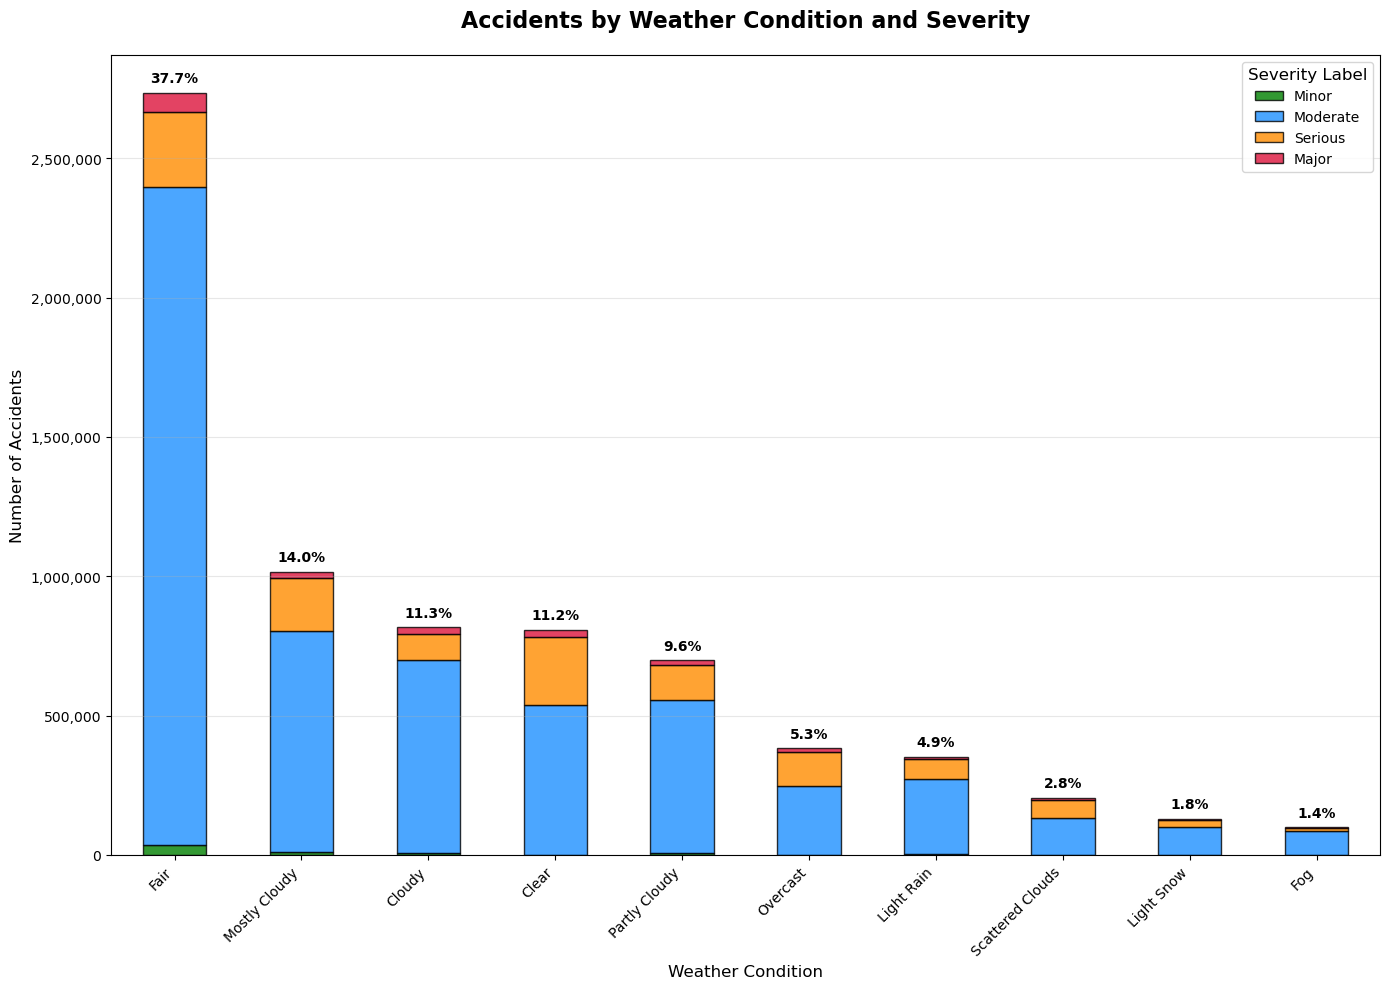

In [55]:
# Create cross-tabulation of weather condition vs severity ---
weather_severity = pd.crosstab(df_clean['weather_condition'], df_clean['severity_label'])

# Get top 10 most common weather conditions
top_weather = weather_severity.sum(axis=1).sort_values(ascending=False).head(10)
weather_severity_top = weather_severity.loc[top_weather.index]

# Order severity from minor to major
severity_order = ['Minor', 'Moderate', 'Serious', 'Major']
weather_severity_top = weather_severity_top[severity_order]

# Calculate total accidents and percentages for each weather condition
total_accidents_by_weather = weather_severity_top.sum(axis=1)
total_all_accidents = weather_severity_top.sum().sum()
percentages = (total_accidents_by_weather / total_all_accidents * 100).round(1)

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 10))

# Plot stacked bar chart
colors = ['green', 'dodgerblue', 'darkorange', 'crimson']
weather_severity_top.plot(
    kind='bar',
    stacked=True,
    color=colors,
    alpha=0.8,
    edgecolor='black',
    ax=ax)

# Customize plot
ax.set_title('Accidents by Weather Condition and Severity', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add total percentage values on top of each bar
for i, (weather, total) in enumerate(total_accidents_by_weather.items()):
    ax.text(i, total + max(total_accidents_by_weather) * 0.01, 
            f'{percentages[weather]}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add legend
ax.legend(title='Severity Label', title_fontsize=12, fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

> **Observation:** The stacked bar chart illustrates the traffic accident frequncy by severity in different top ten weather conditions. Maximum number of road accidents occur in **fair weather condition (37.7%)** followed by **mostly and cloudy** conditions. This shows that the most accidents do not directly correlated with bad weather conditions. 

#### **High-Severity Accidents assocaited with Weather conditions**

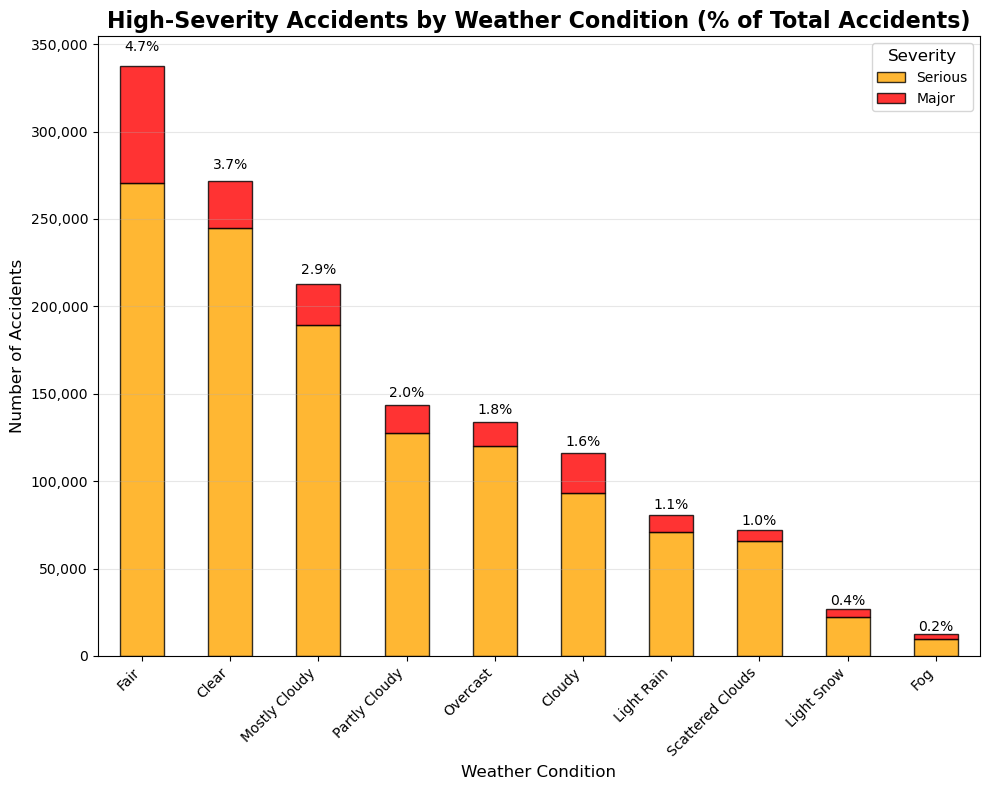

In [56]:
# High-Severity (Major, Serious) accidents
high_severity_accidents = weather_severity_top[['Serious', 'Major']]

# Total accidents across all severities and all weather conditions
total_accidents_all = weather_severity_top.sum().sum()

# Sort weather conditions by total high-severity accidents
sorted_index = high_severity_accidents.sum(axis=1).sort_values(ascending=False).index
high_severity_accidents_sorted = high_severity_accidents.loc[sorted_index]

# Plot stacked bar chart
colors = ['orange', 'red']
ax = high_severity_accidents_sorted.plot(kind='bar', stacked=True, color=colors, figsize=(10,8), 
                                         edgecolor='black', alpha=0.8)

# Add percentage labels (relative to total accidents across all weather and severities)
for i, total in enumerate(high_severity_accidents_sorted.sum(axis=1)):
    percent = round((total / total_accidents_all) * 100, 1)
    ax.text(i, total + total*0.02, 
            f'{percent}%', ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('Number of Accidents', fontsize=12)
ax.set_title('High-Severity Accidents by Weather Condition (% of Total Accidents)', 
             fontsize=16, fontweight='bold')

# Format Y-axis to normal numbers
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity', title_fontsize=12, fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

> **Observation:** This stacked bar shows the high-severity (Serious + Major) accidents by different weather conditions. Surprisingly, most road accidents occur in the **fair** and **clear** weather conditions.

##### **Histogram for Accident Counts vs Temperature**

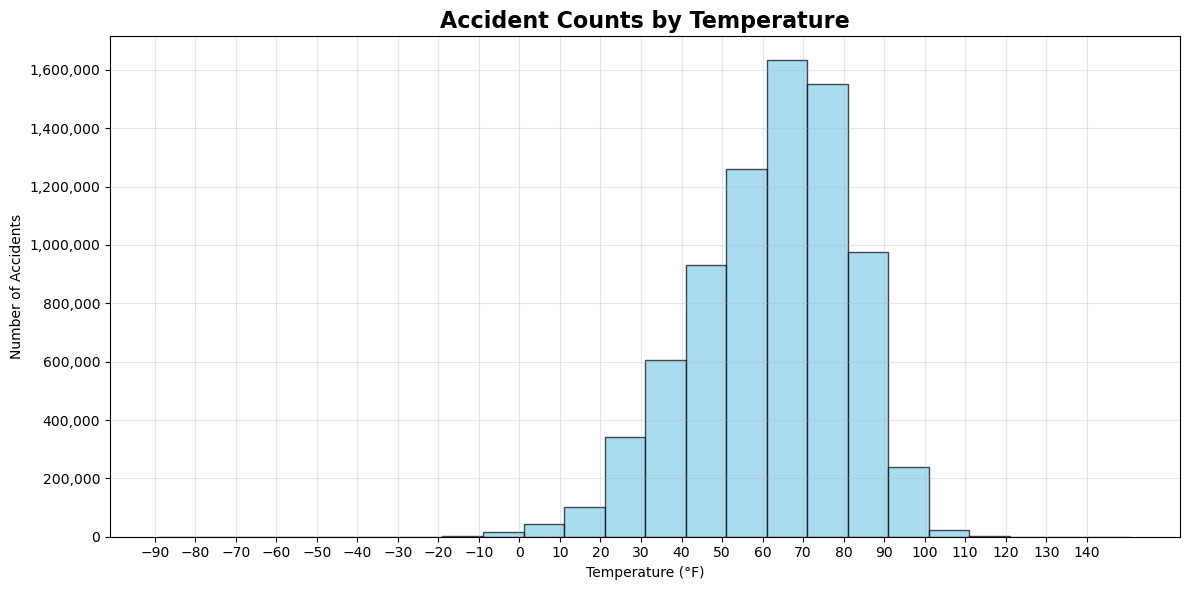

In [57]:
# Histogram of accidents by temperature
plt.figure(figsize=(12, 6))

# Calculate bin edges with width of 10
min_temp = df_clean['temperature(f)'].min()
max_temp = df_clean['temperature(f)'].max()

# Bin width = 10
bin_edges = np.arange(min_temp, max_temp + 10, 10)

plt.hist(df_clean['temperature(f)'].dropna(), bins=bin_edges, color='skyblue', 
         edgecolor='black', alpha=0.7)

# Set x-axis ticks at 10-degree intervals
x_ticks = np.arange(int(min_temp//10)*10, int(max_temp//10 + 1)*10, 10)
plt.xticks(x_ticks)

# Labeling
plt.title('Accident Counts by Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Accidents')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

> **Observation:** The histogram shows the distribution of accident frequencies by temperature. It shows that the most of the accidents occur between 50°F and 90°F indicating that temperature is not only directly correlated with accident occurences.

#### **Further Scatterplots to Investigate Accident Frequency:**
**Accident Count vs. Temperature**

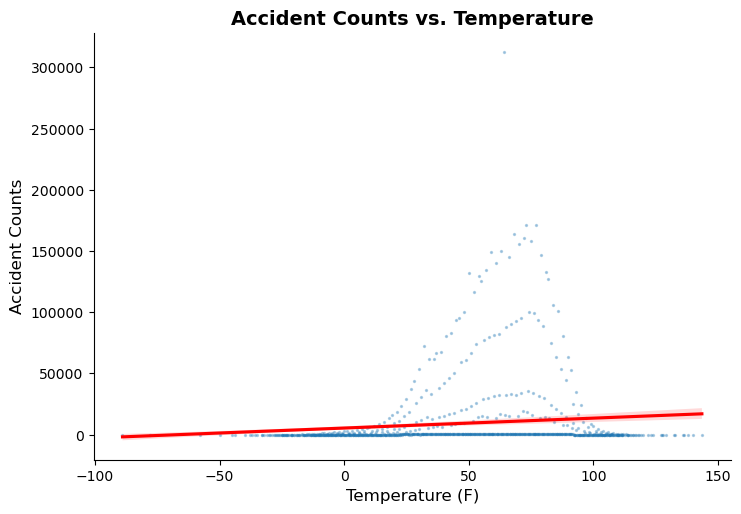

In [58]:
# Calculate the accident counts for temperature range.
# Group by 'temperature(f)' and then get the size of each group.
accident_counts_df = df_clean.groupby('temperature(f)').size().reset_index(name='accident_count')

# Scatterplot for Accident Counts vs Temperature
scatterplot_temp = sns.lmplot(data=accident_counts_df, x='temperature(f)', y='accident_count',
                              height=5, aspect=1.5,  # figure size
                              scatter_kws={'alpha': 0.3, 's': 2},
                              line_kws={'color':'red'})

# Adding labels
plt.title('Accident Counts vs. Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Temperature (F)', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)

# Show scatterplot
plt.show()

**Accident Count vs. Humidity**

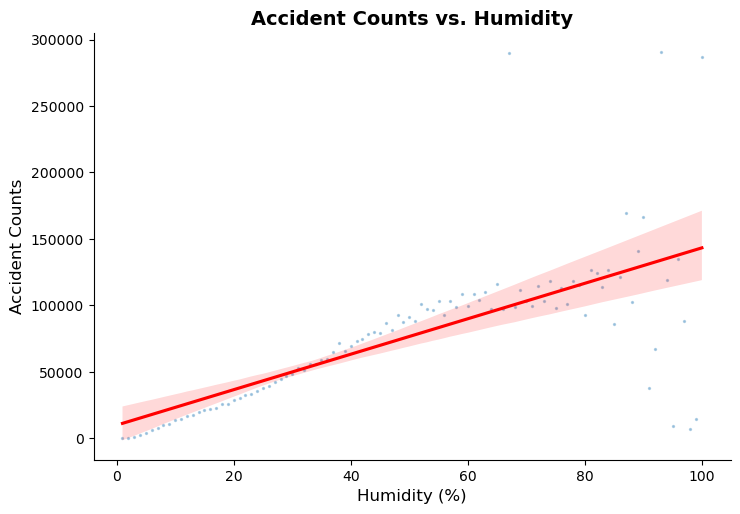

In [59]:
# Group accidents by humidity and count them
accident_counts_df = df_clean.groupby('humidity(%)').size().reset_index(name='accident_count')

# Scatterplot for Accident Counts vs Humidity
scatterplot_humidity = sns.lmplot(
    data=accident_counts_df, 
    x='humidity(%)', 
    y='accident_count',
    height=5, aspect=1.5,   # figure size
    scatter_kws={'alpha': 0.3, 's': 2}, 
    line_kws={'color': 'red'}
)

# Adding labels
plt.title('Accident Counts vs. Humidity', fontsize=14, fontweight='bold')
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)

# Show scatterplot
plt.show()

> **Observation:** Chart illustrates the accident frequencies by humidity (%), which shows possitive relationship.

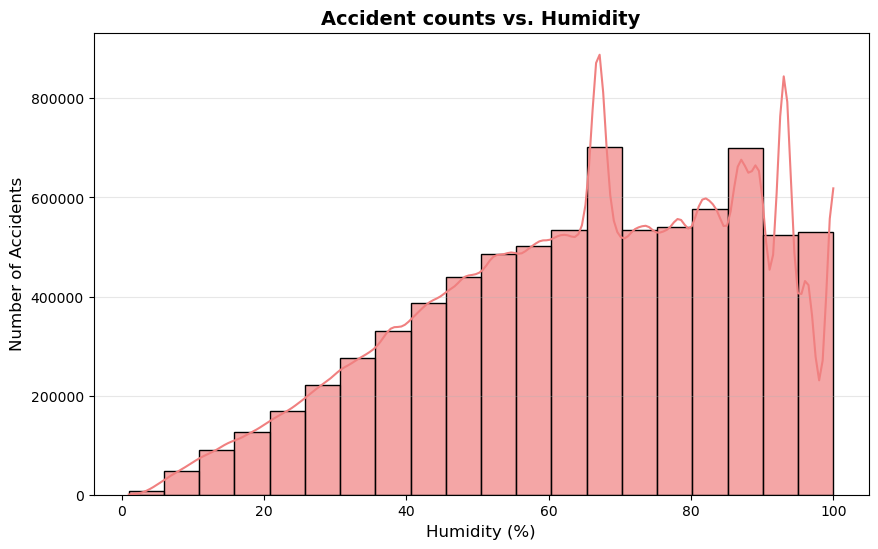

In [60]:
# Accident counts vs. humidity
plt.figure(figsize=(10, 6))
histogram_all = sns.histplot(
    data=df_clean,
    x='humidity(%)',
    bins=20,
    kde=True,
    alpha=0.7,
    color='lightcoral'
)

plt.title('Accident counts vs. Humidity', fontsize=14, fontweight='bold')
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

> **Observation:** The plot shows a **threshold relationship** between humidity and accident frequency. Accident counts **increase with rising humidity levels up to approximately 60%**, indicating a positive correlation in this range. However, **beyond 60% humidity, accident rates plateau and remain stable**, suggesting that higher humidity levels do not further elevate accident risk.
This pattern indicates that humidity serves as a contributing factor to accidents only up to a **saturation point of 60%**, beyond which its influence diminishes and other factors likely become more dominant in determining accident occurrence.

**Accident Count vs. Windchill**

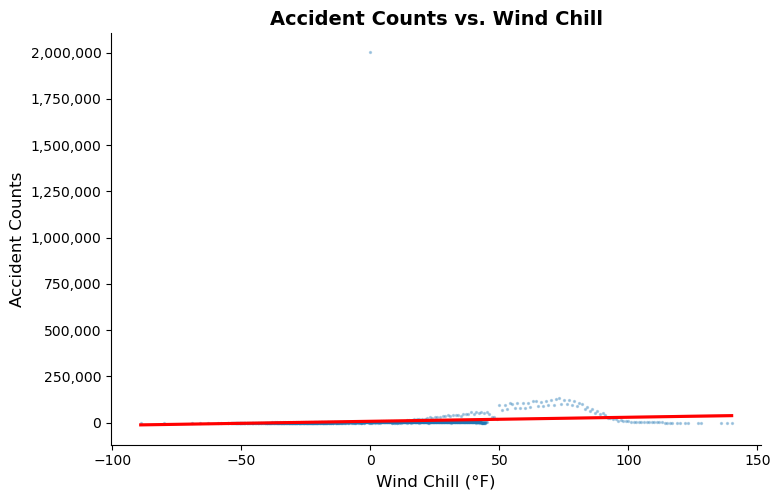

In [61]:
# Group accidents by wind_chill and count them
accident_counts_df = df_clean.groupby('wind_chill(f)').size().reset_index(name='accident_count')

# Scatterplot for Accident Counts vs Wind Chill
scatterplot_wind_chill = sns.lmplot(
    data=accident_counts_df, 
    x='wind_chill(f)', 
    y='accident_count',
    height=5, aspect=1.5,   # figure size
    scatter_kws={'alpha': 0.3, 's': 2}, 
    line_kws={'color': 'red'}
)

# Adding labels
plt.title('Accident Counts vs. Wind Chill', fontsize=14, fontweight='bold')
plt.xlabel('Wind Chill (°F)', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)

# Format y-axis to show full normal numbers without scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Show scatterplot
plt.show()

**Accident Count vs. Visibility**

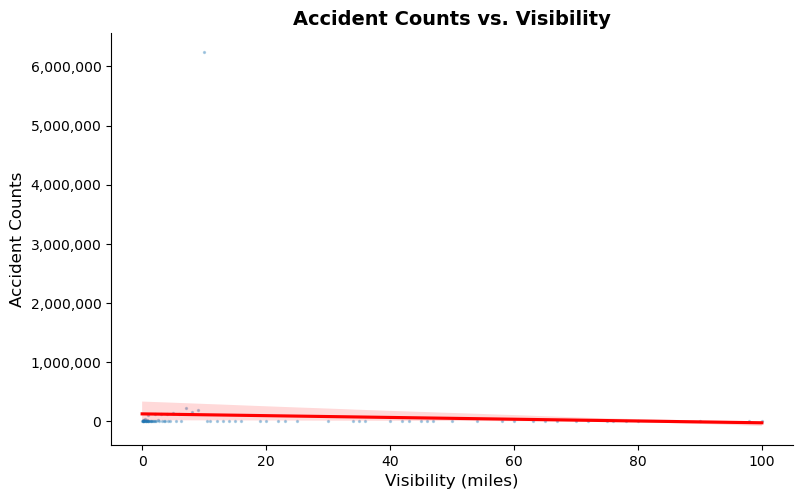

In [62]:
# Group accidents by visibility and count them
accident_counts_df = df_clean.groupby('visibility(mi)').size().reset_index(name='accident_count')

# Scatterplot for Accident Counts vs Visibility
scatterplot_visibility = sns.lmplot(
    data=accident_counts_df, 
    x='visibility(mi)', 
    y='accident_count',
    height=5, aspect=1.5,   # figure size
    scatter_kws={'alpha': 0.3, 's': 2}, 
    line_kws={'color': 'red'}
)

# Adding labels
plt.title('Accident Counts vs. Visibility', fontsize=14, fontweight='bold')
plt.xlabel('Visibility (miles)', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)

# Format y-axis to show full normal numbers without scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Show scatterplot
plt.show()

**Accident Count vs. Wind Speed**

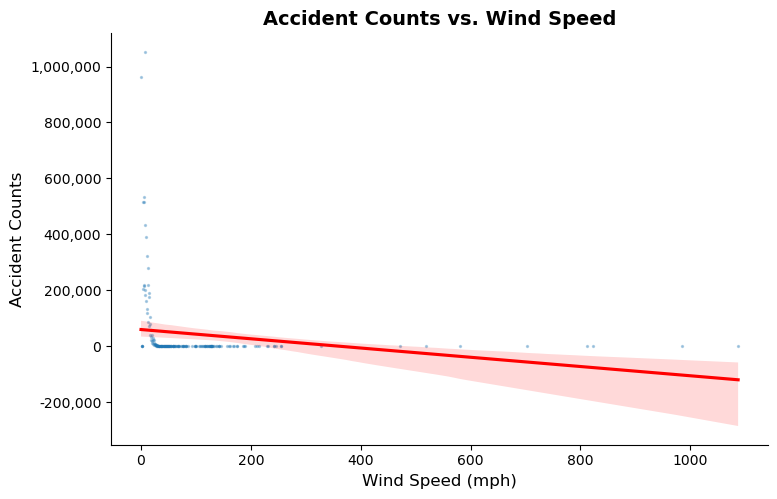

In [63]:
# Group accidents by wind speed and count them
accident_counts_df = df_clean.groupby('wind_speed(mph)').size().reset_index(name='accident_count')

# Scatterplot for Accident Counts vs Wind Speed
scatterplot_wind_speed = sns.lmplot(
    data=accident_counts_df, 
    x='wind_speed(mph)', 
    y='accident_count',
    height=5, aspect=1.5,   # figure size
    scatter_kws={'alpha': 0.3, 's': 2}, 
    line_kws={'color': 'red'}
)

# Adding labels
plt.title('Accident Counts vs. Wind Speed', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)

# Format y-axis to show full normal numbers without scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Show scatterplot
plt.show()

> **Observation:** From above correlation plots it can be concluded that the factors visibility, wind speed, wind chill do not directly influence the accident counts.

In [64]:
# Export final dataframe "Cleaned Data" as pickle

df_clean.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_accidents_6-2.pkl'))

### Research Questions from Previous Step
#### **Geographical Analysis**
1. **Which geographic areas (state) have the highest concentration of severe accidents?**
    - The highest concentration of accidents occurs in California (22.5%), while Wyoming, North Dakota, South Dakota, Maine, and Vermont report the lowest, with 0% of accidents.
3. How do accident patterns differ between urban and rural settings?
4. Which specific street types or locations show recurring accident patterns?
5. Which areas have the highest density of accidents near amenities and stations?
6. How do accident patterns differ across time zones and regions?
##### **Severity & Impact Analysis**
6. **What weather conditions are most strongly associated with high-severity accidents?**
    - High-severity accidents (Serious and Major) are most frequently associated with fair and clear weather conditions.
8. **What combination of time, weather, and location factors predicts high-severity accidents?**
   - Accident severity does not show a direct correlation with visibility conditions. However, accident frequencies exhibit clear temporal patterns: they peak during the morning hours of 6–8 AM and the afternoon period of 3–5 PM, coinciding with typical rush hour traffic when commuter volume is highest. In contrast, late morning to early afternoon hours experience a notable decline in accidents, reflecting lower traffic density outside peak commuting times. These trends suggest that time of day and traffic volume play a more significant role in accident occurrence than visibility alone.
10. How does accident severity correlate with visibility conditions and time of day?
11. Can we identify specific weather condition thresholds that trigger increased accident risk?
12. What are the most common weather and time combinations for severe accidents in different regions?
#### **Temporal Patterns & Trends**
11. **What are the peak periods for road accidents across daily, weekly, and seasonal cycles?**
    - Accidents peak during morning (6–8 AM) and afternoon (3–5 PM) rush hours on weekdays, which have significantly higher rates (15.7%–17.7%) than weekends. Winter months, especially December (11.7%) and January (9.7%), show the highest frequency.
13. **What is the trend in accident frequency and severity from 2016-2023?**
    - Accident frequency increased steadily from 2016 to 2022, while severity distribution remained consistent—dominated by minor accidents, followed by moderate, serious, and major incidents.
15. What is the relationship between temperature extremes and accident occurrence?
#### **Road Infrastructure & Features**
14. Which road infrastructure features (junctions, signals, crossings) are present at high-severity accident locations?
15. Which road features (traffic signals, stops, junctions) are most effective at reducing accident severity?

### **4. Hypotheses**

- **Rush Hour Hypothesis:** Accident frequency is significantly higher during morning (6-8 AM) and afternoon (3-5 PM) rush hours due to increased traffic density and commuter pressure.
- **Weekday Commuting Hypothesis:** Weekdays have a higher accident rate than weekends, supporting the link between accident risk and work-related commuting traffic.
- **Winter Conditions Hypothesis:** The increased accident frequency in winter months (Dec/Jan) is causally linked to adverse weather conditions like precipitation, fog, and icy roads.
- **Humidity Threshold Hypothesis:** There is a positive correlation between humidity and accident risk up to a threshold of approximately 60%, after which the effect plateaus.
- **Severity Consistency Hypothesis:** While the total number of accidents may change year-to-year, the proportional distribution of accident severity (minor, moderate, serious, fatal) remains stable over time.
- **Long-Term Trend Hypothesis:** The observed year-over-year increase in accident frequency from 2016-2022 represents a significant upward trend, not due to random variation.
- **Geographic Risk Hypothesis:** States with higher population density and traffic volume (e.g., California) have disproportionately higher severe accident counts compared to low-density states.
- **Environmental & Travel Factor Hypothesis:** Environmental and trip factors (precipitation, wind, distance) increase accident frequency, while temperature, humidity, and visibility have limited impact on severity.